# Sales Data Analysis
##### Brainwave Matrix Solutions Internship Project

In [212]:
# Importing necessary libraries 

import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [213]:
# to get current working directory

os.getcwd()      

'C:\\Users\\dell\\Desktop\\Brainwave Matrix Solutions Internship'

In [214]:
# Load Dataset

dataset= pd.read_csv("C:\\Users\\dell\\Desktop\\Brainwave Matrix Solutions Internship\\Sales Data.csv")
dataset


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


## Data Preparation 
#### Inspect the Data
#### check the structure and content of the data before proceeding

In [216]:
# Check the first few rows
dataset.head()

# Summary of data types and missing values
dataset.info()

# Statistical summary
dataset.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


#### Handle Missing Data:
#### Check for missing values and decide how to handle them (e.g., remove or fill in with an appropriate value).

In [218]:
# Check for missing values
dataset.isnull().sum()


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

#### Remove Duplicates:
#### Check for duplicate rows and remove them if necessary.

In [220]:
# Check for duplicates
dataset.duplicated().sum()


0

##### Convert Data Types:
#### Ensure that the columns have the correct data types (e.g., dates, numbers).


In [222]:
# Convert 'Order Date' to datetime
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], errors='coerce')


In [223]:
# Convert 'Price Each' and 'Quantity Ordered' to numeric
dataset['Price Each'] = pd.to_numeric(dataset['Price Each'], errors='coerce')
dataset['Quantity Ordered'] = pd.to_numeric(dataset['Quantity Ordered'], errors='coerce')

In [224]:
print(dataset.dtypes)


Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object


In [225]:
dataset.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305
min,0.000000,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000
std,5450.554093,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416


#### Extract Additional Features:
#### Based on your dataset, extract useful features like Day, Weekday, Revenue, and Hour from existing columns.

In [227]:
# Extract 'Day', 'Weekday', and 'Hour' from 'Order Date'
dataset['Day'] = dataset['Order Date'].dt.day
dataset['Weekday'] = dataset['Order Date'].dt.weekday
dataset['Hour'] = dataset['Order Date'].dt.hour


In [228]:
# Calculate total revenue for each order
dataset['Total Revenue'] = dataset['Quantity Ordered'] * dataset['Price Each']

#### Remove Unnecessary Columns:
#### Remove columns that don’t provide meaningful information (e.g., the index-like Unnamed: 0).

In [230]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)


In [231]:
dataset.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour,Day,Weekday,Total Revenue
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305,15.759532,2.991482,185.490917
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000,1.000000,0.000000,2.990000
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000,8.000000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000,16.000000,3.000000,14.950000
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000,23.000000,5.000000,150.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000,31.000000,6.000000,3400.000000
std,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416,8.782176,2.001968,332.919771


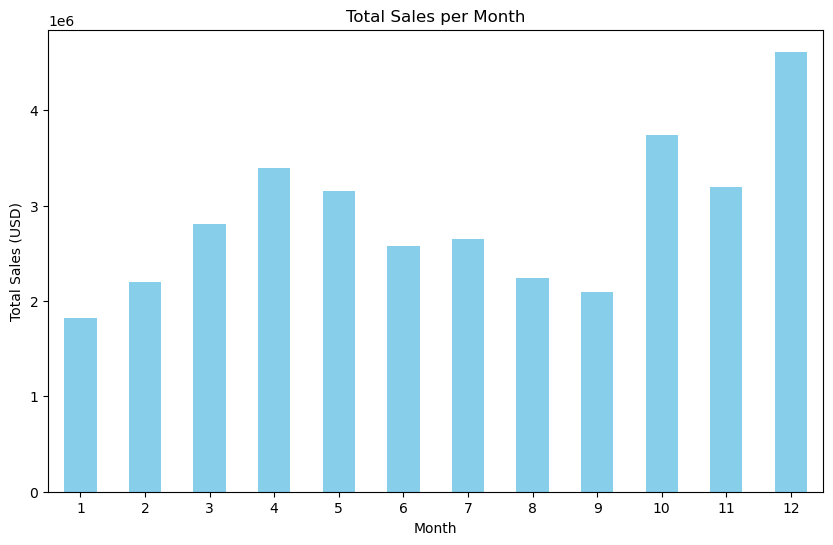

In [232]:
# Total sales per month, summing only the 'Sales' column

monthly_sales = dataset.groupby('Month')['Sales'].sum()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Month')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()



#### Best-Selling Products
#### You can identify which products generated the most sales over time.

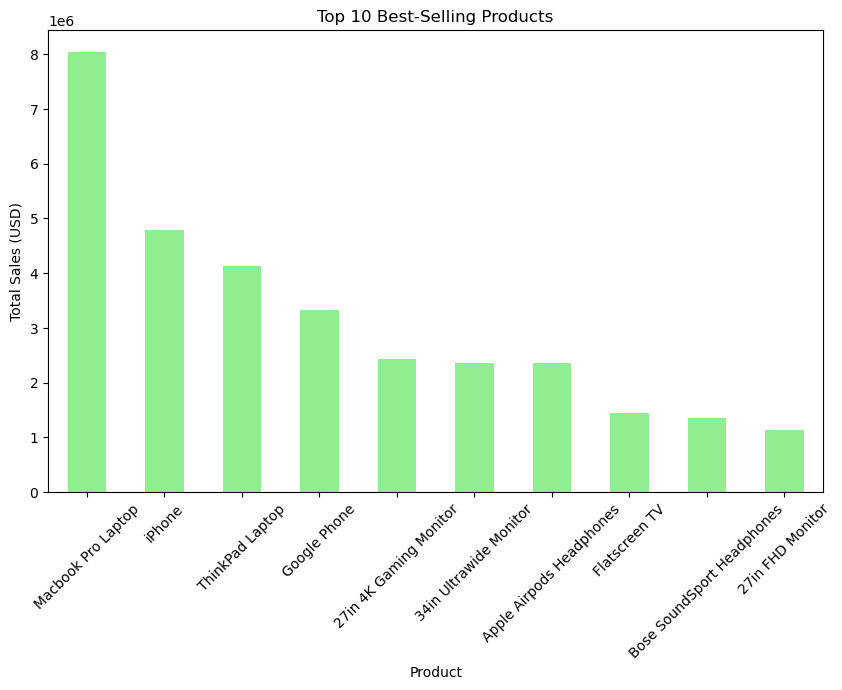

In [234]:
# Total sales per product
product_sales = dataset.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Plot the top 10 best-selling products
plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Best-Selling Products')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.show()


#### Sales by City
#### Find out which cities generated the highest sales.

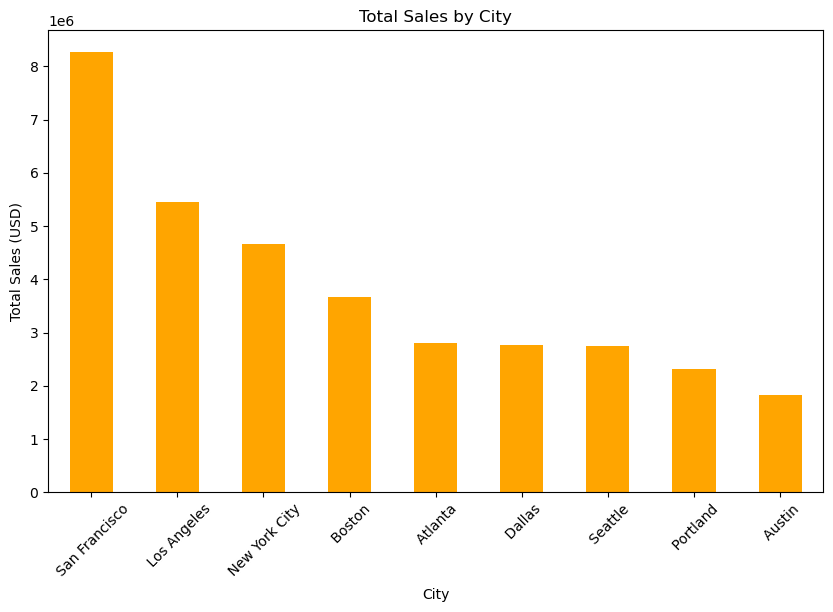

In [236]:
# Total sales per city
city_sales = dataset.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot the sales by city
plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by City')
plt.ylabel('Total Sales (USD)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


#### Peak Sales Hours
#### Analyze the time of day when sales are the highest.

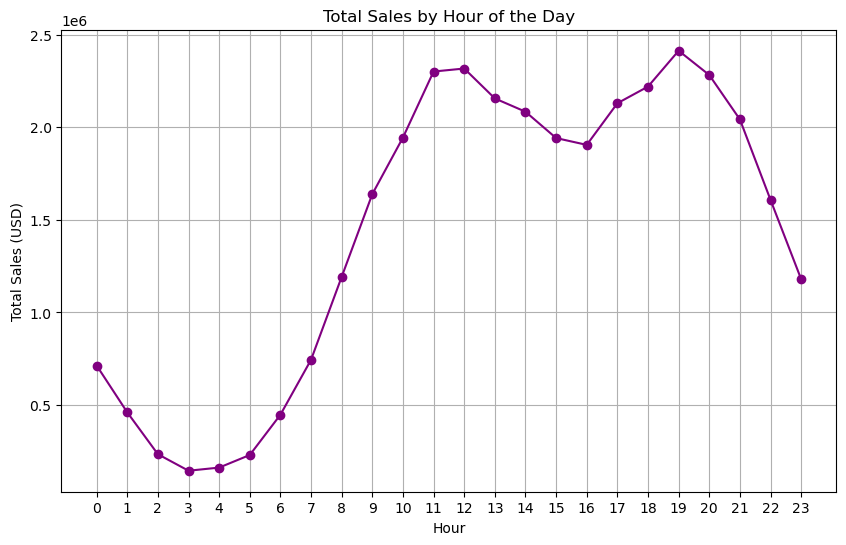

In [238]:
# Total sales per hour
hourly_sales = dataset.groupby('Hour')['Sales'].sum()

# Plot sales by hour
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Total Sales by Hour of the Day')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Hour')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


#### Correlation Analysis
#### You can analyze the correlation between different numeric columns, such as Quantity Ordered, Price Each, and Sales.

#### Code for correlation heatmap:

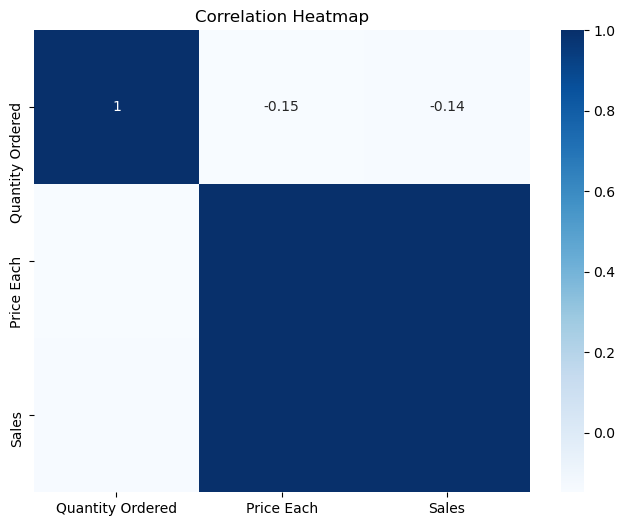

In [240]:
import seaborn as sns
# Correlation matrix
corr_matrix = dataset[['Quantity Ordered', 'Price Each', 'Sales']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


#### Monthly Sales Trends
#### If you'd like to explore the sales trends month by month, you can also calculate the cumulative sales over time.

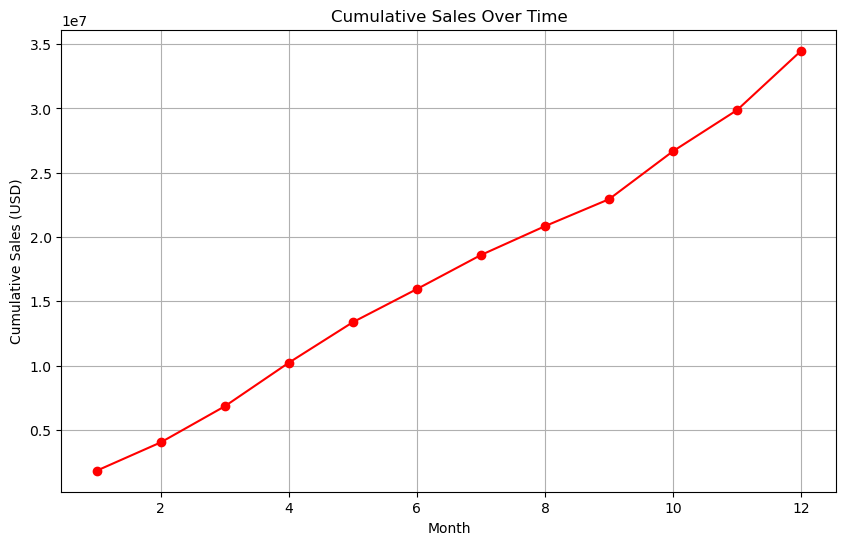

In [242]:
# Cumulative sales over the months
cumulative_sales = monthly_sales.cumsum()

# Plot the cumulative sales
plt.figure(figsize=(10, 6))
cumulative_sales.plot(kind='line', marker='o', color='red')
plt.title('Cumulative Sales Over Time')
plt.ylabel('Cumulative Sales (USD)')
plt.xlabel('Month')
plt.grid(True)
plt.show()
